<a href="https://colab.research.google.com/github/Sergio-Tolaba/Data_Science_challenge_2/blob/main/ds_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X - Análisis de fuga de Clientes

* **Extracción - Transformación - Carga de datos (ETL =  Extract, Transform, Load)**

## Extracción

In [ ]:
import pandas as pd

In [ ]:
url ='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df_telecom = pd.read_json(url)
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# Verifico que no hay datos nulos
df_telecom.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
# Verifico la forma del DataFrame
df_telecom.shape

(7267, 6)

In [ ]:
# Listo el nombre de las columnas
df_telecom.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

* Nota: Luego de la extracción de los datos podemos decir que no hay datos nulos y que varias columnas tienen diccionarios anidados. El paso siguiente es hacer una apertura de dichas columnas en columnas simples (normalización del archivo JSON).

## Transformación

In [ ]:
# Columnas anidadas las despliego en columnas simples
df_telecom_simple = pd.json_normalize(
    df_telecom.to_dict(orient='records'),
    sep='_')
df_telecom_simple.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Creo una copia independiente del DataFrame original y listo columnas
df = df_telecom_simple.copy()
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

## Carga y Análisis Exploratorio de Datos (EDA = Exploratory Data Analysis)

* Objetivo: Detectar patrones de cancelación que permitan al equipo de Data Science diseñar modelos predictivos y estrategias de retención de clientes.

1. Inspección de los datos luego de la normalización del archivo JSON

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

2. Convertir columnas de análisis: tipo object a numérica - manejo numérico

In [ ]:
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
print(df['Churn'].unique())

['No' 'Yes' '']


## Gráficos que muestran los detalles del análisis

a) Clientes que cancelaron el servicio de la empresa Telecom X (No, Yes, " ")

In [ ]:
import plotly.express as px

# Contar manualmente
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Cantidad de clientes']

# Crear gráfico de barras
fig = px.bar(churn_counts, x='Churn', y='Cantidad de clientes', color='Churn',
             title='Distribución interactiva de Churn o cancelación del Servicio',
             labels={'Churn': '¿Canceló el servicio?', 'Cantidad de clientes': 'Cantidad de clientes'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(bargap=0.2)
fig.show()




* Observación: La mayoría de los clientes No cancelaron el servicio pero hay un número significativo que Sí cancelaron el servicio

b) Tres gráficos importantes que muestran la cantidad de clientes respecto a los meses (0-72)
* b.1) customer_tenure => Antiguedad de los clientes en la empresa
* b.2) account_Charges_Monthly => Cargos mensuales
* b.3) account_Charges_Total => Cargos acumulados desde que son clientes
  

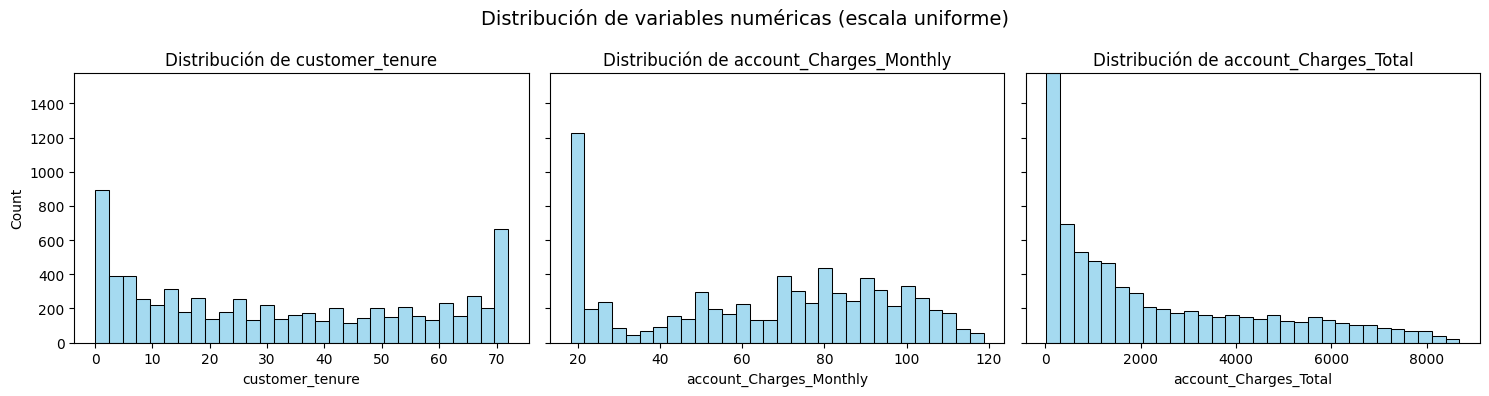

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_cols = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']

# Determinar el máximo valor de Y entre todos los histogramas para igualar la escala
max_y = 0
for col in num_cols:
    counts, _ = np.histogram(df[col].dropna(), bins=30)
    max_y = max(max_y, counts.max())

# Crear los subgráficos
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4), sharey=True)

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylim(0, max_y)  # Uniformar escala Y

fig.suptitle("Distribución de variables numéricas (escala uniforme)", fontsize=14)
plt.tight_layout()
plt.show()


**Análisis**
* b.1) Muchos clientes abandonan el servicio en los 12 primeros meses y hay muchos clientes leales o antiguos (con el servicio por más de 60 meses)
* b.2) La mayoría de los clientes tienen planes económicos.
* b.3) Gran cantidad de clientes generan ingresos bajos para la empresa

## Comparación de Churn o cancelación del servicio para las categorías de contrato: mensual, anual o bianual

In [ ]:
sns.countplot(x='account_Contract', hue='Churn', data=df)
plt.title("Churn según tipo de contrato")
plt.show()

* Observación: Contratos mensuales tienen mayor tasa de cancelación, lo que sugiere que los clientes con contratos a largo plazo tienden a permanecer más tiempo.

## Cancelación por método de pago

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y='account_PaymentMethod', hue='Churn', data=df, palette='Set3')
ax.set_title("Churn según método de pago")
ax.set_xlabel("Cantidad de clientes")
ax.set_ylabel("Método de pago")
plt.legend(title='Churn')
plt.show()

* Observación: Algunos métodos como el débito automático parecen tener menor tasa de cancelación.

## Correlación entre variables numéricas y Churn (cancelaciones del servicio)

In [ ]:
df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

correlation = df.corr(numeric_only=True)['Churn_bin'].sort_values(ascending=False)
print(correlation)

* Observación: El análisis de correlación nos ayuda a detectar qué variables tienen relación directa con la cancelación del servicio.

# Informe Final - Análisis de Cancelación de Clientes en Telecom X

## Contexto del Proyecto

Telecom X enfrenta una creciente pérdida de clientes. Con el objetivo de reducir la tasa de cancelación (_Churn_), este proyecto analiza los datos históricos de clientes para descubrir patrones que expliquen los motivos de abandono.

---

## Análisis Exploratorio de Datos (EDA)

### 1. Distribución general de Churn

El análisis muestra un desequilibrio entre clientes que permanecen y los que cancelan el servicio:

- Clientes que **no cancelaron**: mayoría.
- Clientes que **sí cancelaron**: minoría, pero significativa.

> Este desequilibrio debe considerarse al generar futuros modelos de predicción.

---

### 2. Distribución de variables numéricas

Se analizaron tres variables numéricas clave:

- 'customer_tenure' (meses como cliente)
- 'account_Charges_Monthly' (gasto mensual en USD)
- 'account_Charges_Total' (gasto total acumulado en USD)

Para facilitar la comparación, se estandarizó la escala de los gráficos:

**Observaciones:**

- La mayoría de los clientes tiene una permanencia menor a 20 meses.
- El gasto mensual varía, con picos entre 20 y 100 USD.
- El gasto total está muy sesgado hacia la izquierda: muchos clientes nuevos.

---

### 3. Cancelación según tipo de contrato

Clientes con **contratos mensuales** cancelan con mucha más frecuencia que los de contrato anual o de dos años.

> Sugerencia: fomentar contratos más largos mediante descuentos o beneficios.

---

### 4. Cancelación por método de pago

Métodos como **débito automático** tienen tasas más bajas de cancelación, en comparación con pago con cheques o tarjetas.

> Sugerencia: incentivar métodos de pago automáticos para reducir el churn.

---

### 5. Correlaciones con la variable objetivo

Las variables más correlacionadas con la cancelación (`Churn`) fueron:

- Tener contrato mensual (positiva con Churn)
- Menor tenure (inversamente correlacionado)
- Usar pagos manuales (positiva con Churn)

> Las variables relacionadas con servicios adicionales (seguridad, soporte, etc.) deben incluirse en próximos modelos.

---

## **Conclusiones y Recomendaciones**

- **Contratos a largo plazo** se asocian con mayor retención.
- **Permanencia** y **cargos totales** predicen la lealtad del cliente.
- **Métodos de pago automáticos** deberían promocionarse.
- Es importante analizar con más detalle los servicios contratados por los clientes.

Este informe servirá como base para construir modelos predictivos que permitan **anticipar y prevenir la cancelación de clientes** en Telecom X.
